### Set up

We first import the different libraries that we will be using for this project

In [29]:
import pandas as pd

We import our dataset

In [30]:
data_path="data/fires-weather.csv"
try:
    weather_fires=pd.read_csv(data_path)
except Exception as error:
    print(f"Error while importing the excel file: {error}")
weather_fires.head()

,Anno,Semana,Temp Media (oC)_mean,Temp Media (oC)_var,Temp Max (oC)_mean,Temp Max (oC)_var,Temp Minima (oC)_mean,Temp Minima (oC)_var,Humedad Media (%)_mean,Humedad Media (%)_var,...,Velviento (m/s)_mean_Semana_Pasada,Velviento (m/s)_var_Semana_Pasada,DirViento (o)_mean_Semana_Pasada,DirViento (o)_var_Semana_Pasada,VelVientoMax (m/s)_mean_Semana_Pasada,VelVientoMax (m/s)_var_Semana_Pasada,Precipitacion (mm)_mean_Semana_Pasada,Precipitacion (mm)_var_Semana_Pasada,superficie,numero_incendios
0,2009.0,2.0,-0.0100,5.6949,6.0243,1.2704,-4.7957,7.6270,84.9143,64.8848,...,0.4225,0.0305,265.2250,1311.6225,2.2250,0.4458,2.1500,3.2367,0.0,0.0
1,2009.0,3.0,5.2371,9.2971,10.8743,6.9375,0.2771,23.3576,83.9286,22.9157,...,0.5871,0.1133,168.9271,7319.5652,3.3657,2.5485,0.0286,0.0057,6.0,2.0
2,2009.0,4.0,7.0757,16.1478,10.7657,13.3214,3.2914,15.5250,86.3514,65.5492,...,0.9257,0.1616,188.8143,1046.4948,4.6986,2.2187,1.4857,1.4648,13.1,2.0
3,2009.0,5.0,8.4686,9.2649,11.7971,9.0843,4.6414,13.2162,82.7800,187.0814,...,1.6843,0.6017,228.4000,453.4900,8.4100,11.9590,10.0571,65.8895,0.0,0.0
4,2009.0,6.0,3.5871,3.4337,8.7414,4.8479,-0.5229,4.2174,89.0714,8.9690,...,1.3171,1.0443,191.2714,2703.0124,6.6129,10.2418,9.3143,51.9448,0.0,0.0


### Split train and test data

In [31]:
# Dividir los datos en train y test
df_train = weather_fires[weather_fires['Anno'] <= 2015].reset_index(drop=True) #Modificados
df_test = weather_fires[weather_fires['Anno'] >= 2016].reset_index(drop=True)

df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)


# Calcular tamaños de train y test
train_size = len(df_train)
test_size = len(df_test)
total_size = len(weather_fires)

# Calcular porcentajes
train_percentage = (train_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

# Mostrar resultados
print(f"\nTamaño total: {total_size}")
print(f"Train: {train_size} filas ({train_percentage:.2f}%)")
print(f"Test: {test_size} filas ({test_percentage:.2f}%)")

# Verificar los resultados
print("Train:")
print(df_train.head(), "\n--------------\n", df_train.tail())
print("\nTest:")
print(df_test.head(), "\n--------------\n", df_test.tail()) # No se usará hasta el final

x_train = df_train.drop(columns=['superficie', 'numero_incendios'])
y_train = df_train['superficie']
y_train_2 = df_train['numero_incendios']

x_test = df_test.drop(columns=['superficie', 'numero_incendios'])
y_test = df_test['superficie']
y_test_2 = df_test['numero_incendios']

x_train.head()


Tamaño total: 529
Train: 369 filas (69.75%)
Test: 160 filas (30.25%)
Train:
     Anno  Semana  Temp Media (oC)_mean  Temp Media (oC)_var  \
0  2009.0     2.0               -0.0100               5.6949   
1  2009.0     3.0                5.2371               9.2971   
2  2009.0     4.0                7.0757              16.1478   
3  2009.0     5.0                8.4686               9.2649   
4  2009.0     6.0                3.5871               3.4337   

   Temp Max (oC)_mean  Temp Max (oC)_var  Temp Minima (oC)_mean  \
0              6.0243             1.2704                -4.7957   
1             10.8743             6.9375                 0.2771   
2             10.7657            13.3214                 3.2914   
3             11.7971             9.0843                 4.6414   
4              8.7414             4.8479                -0.5229   

   Temp Minima (oC)_var  Humedad Media (%)_mean  Humedad Media (%)_var  ...  \
0                7.6270                 84.9143         

,Anno,Semana,Temp Media (oC)_mean,Temp Media (oC)_var,Temp Max (oC)_mean,Temp Max (oC)_var,Temp Minima (oC)_mean,Temp Minima (oC)_var,Humedad Media (%)_mean,Humedad Media (%)_var,...,Humedad Min (%)_mean_Semana_Pasada,Humedad Min (%)_var_Semana_Pasada,Velviento (m/s)_mean_Semana_Pasada,Velviento (m/s)_var_Semana_Pasada,DirViento (o)_mean_Semana_Pasada,DirViento (o)_var_Semana_Pasada,VelVientoMax (m/s)_mean_Semana_Pasada,VelVientoMax (m/s)_var_Semana_Pasada,Precipitacion (mm)_mean_Semana_Pasada,Precipitacion (mm)_var_Semana_Pasada
0,2009.0,2.0,-0.0100,5.6949,6.0243,1.2704,-4.7957,7.6270,84.9143,64.8848,...,71.8900,129.9207,0.4225,0.0305,265.2250,1311.6225,2.2250,0.4458,2.1500,3.2367
1,2009.0,3.0,5.2371,9.2971,10.8743,6.9375,0.2771,23.3576,83.9286,22.9157,...,57.9471,169.8400,0.5871,0.1133,168.9271,7319.5652,3.3657,2.5485,0.0286,0.0057
2,2009.0,4.0,7.0757,16.1478,10.7657,13.3214,3.2914,15.5250,86.3514,65.5492,...,61.5900,120.7452,0.9257,0.1616,188.8143,1046.4948,4.6986,2.2187,1.4857,1.4648
3,2009.0,5.0,8.4686,9.2649,11.7971,9.0843,4.6414,13.2162,82.7800,187.0814,...,69.8471,116.0222,1.6843,0.6017,228.4000,453.4900,8.4100,11.9590,10.0571,65.8895
4,2009.0,6.0,3.5871,3.4337,8.7414,4.8479,-0.5229,4.2174,89.0714,8.9690,...,66.6114,416.3145,1.3171,1.0443,191.2714,2703.0124,6.6129,10.2418,9.3143,51.9448


## Train models

In [32]:

!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


### Analyze train data set

In [33]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline

x_train = x_train.dropna()
y_train = y_train[x_train.index]
y_train_2 = y_train_2[x_train.index]

x_test = x_test.dropna()
y_test = y_test[x_test.index]
y_test_2 = y_test_2[x_test.index]

# Data split
inner_cv = TimeSeriesSplit(n_splits=7)

Se entrenará cada modelo, se obtendrá la configuracion de hiperparámetro que mejor mae presenta, y luego se hará un prediction con los datos de train mostrandolo en un agrafica

#### KNN model

In [34]:
knn_pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsRegressor())]
)

# KNN con ajuste de hiperparámetros ---------------------------------------
param_grid = {
    'knn__n_neighbors': [3,5,7,11,15,19,23,25],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan'] 
}

knn_hpo = GridSearchCV(knn_pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner_cv, n_jobs=-1, verbose=1)
knn_hpo.fit(x_train, y_train)

knn_hpo_2 = GridSearchCV(knn_pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner_cv, n_jobs=-1, verbose=1)
knn_hpo_2.fit(x_train, y_train_2)

print("Superficier quemado")
print(f"Mejor puntuación MAE: ", -knn_hpo.best_score_)
print("Mejores hiperparámetros:", knn_hpo.best_params_)

print("\nNumero de incendios")
print(f"Mejor puntuación MAE: ", -knn_hpo_2.best_score_)
print("Mejores hiperparámetros:", knn_hpo_2.best_params_)


Fitting 7 folds for each of 48 candidates, totalling 336 fits
Fitting 7 folds for each of 48 candidates, totalling 336 fits
Superficier quemado
Mejor puntuación MAE:  244.99682702374253
Mejores hiperparámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}

Numero de incendios
Mejor puntuación MAE:  8.656836678028359
Mejores hiperparámetros: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}


#### Decission Tree Model

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_pipe = Pipeline([
    ('tree', DecisionTreeRegressor(random_state=42))
])

#Árboles de regresión con HPO -----------------------------

param_grid = {
    'tree__criterion':['squared_error', 'friedman_mse', 'absolute_error'],
    'tree__max_depth': [5,7,9,11],
    'tree__min_samples_split': [40 ,50, 70, 90, 110, 130, 150],
}


tree_hpo = GridSearchCV(tree_pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner_cv, n_jobs=-1, verbose=1)
tree_hpo.fit(x_train, y_train)

tree_hpo_2 = GridSearchCV(tree_pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner_cv, n_jobs=-1, verbose=1)
tree_hpo_2.fit(x_train, y_train_2)

print("Superficier quemado")
print(f"Mejor puntuación MAE: ", -tree_hpo.best_score_)
print("Mejores hiperparámetros:", tree_hpo.best_params_)

print("\nNumero de incendios")
print(f"Mejor puntuación MAE: ", -tree_hpo_2.best_score_)
print("Mejores hiperparámetros:", tree_hpo_2.best_params_)


Fitting 7 folds for each of 84 candidates, totalling 588 fits
Fitting 7 folds for each of 84 candidates, totalling 588 fits
Superficier quemado
Mejor puntuación MAE:  289.00150420491633
Mejores hiperparámetros: {'tree__criterion': 'squared_error', 'tree__max_depth': 9, 'tree__min_samples_split': 110}

Numero de incendios
Mejor puntuación MAE:  8.28888888888889
Mejores hiperparámetros: {'tree__criterion': 'absolute_error', 'tree__max_depth': 9, 'tree__min_samples_split': 110}


#### RandomForest Model

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define the Random Forest pipeline
rf_pipe = Pipeline([
    ('rf', RandomForestRegressor(random_state=42))
])

# Random Forest Regression with Hyperparameter Optimization (HPO)
param_grid = {
    'rf__n_estimators': [50, 100, 150, 200],  # Number of trees
    'rf__max_depth': [5, 10, 15, 20, None],  # Maximum depth of trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf
    'rf__max_features': ['sqrt', 'log2']  # Number of features considered for splitting
}


rf_hpo = GridSearchCV(rf_pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner_cv, n_jobs=-1, verbose=1)
rf_hpo.fit(x_train, y_train)

rf_hpo_2 = GridSearchCV(rf_pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner_cv, n_jobs=-1, verbose=1)
rf_hpo_2.fit(x_train, y_train_2)


print("Superficier quemado")
print(f"Best MAE score: {-rf_hpo.best_score_:.2f}")
print("Best hyperparameters:", rf_hpo.best_params_)

print("\nNumero de incendios")
print(f"Best MAE score: {-rf_hpo_2.best_score_:.2f}")
print("Best hyperparameters:", rf_hpo_2.best_params_)

Fitting 7 folds for each of 360 candidates, totalling 2520 fits


C:\Users\Dongi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 7 folds for each of 360 candidates, totalling 2520 fits
Superficier quemado
Best MAE score: 297.71
Best hyperparameters: {'rf__max_depth': 10, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}

Numero de incendios
Best MAE score: 9.74
Best hyperparameters: {'rf__max_depth': 10, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}


#### SVM model

In [37]:
from sklearn.svm import SVR

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR())
])

#SVM hpo -------------------
param_grid = {
    'svm__kernel': ['rbf', 'poly'],
    'svm__C': [1, 100, 1000, 1100],
    'svm__degree': [1, 2, 3],
    'svm__gamma': ['scale' , 0.001, 0.1]
}

svm_hpo = GridSearchCV(svm_pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner_cv, n_jobs=-1, verbose=1)
svm_hpo.fit(x_train, y_train)

svm_hpo_2 = GridSearchCV(svm_pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner_cv, n_jobs=-1, verbose=1)
svm_hpo_2.fit(x_train, y_train_2)

print("Superficier quemado")
print(f"Mejor puntuación MAE: ", -svm_hpo.best_score_)
print("Mejores hiperparámetros:", svm_hpo.best_params_)

print("\nNumero de incendios")
print(f"Mejor puntuación MAE: ", -svm_hpo_2.best_score_)
print("Mejores hiperparámetros:", svm_hpo_2.best_params_)

Fitting 7 folds for each of 72 candidates, totalling 504 fits
Fitting 7 folds for each of 72 candidates, totalling 504 fits
Superficier quemado
Mejor puntuación MAE:  208.06351553693025
Mejores hiperparámetros: {'svm__C': 1000, 'svm__degree': 1, 'svm__gamma': 0.001, 'svm__kernel': 'poly'}

Numero de incendios
Mejor puntuación MAE:  7.605297772169351
Mejores hiperparámetros: {'svm__C': 100, 'svm__degree': 1, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}


#### XGBoost Model

In [38]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae')

# Definir el GridSearchCV para la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}


xgb = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=1, n_jobs=-1)
xgb.fit(x_train, y_train)

xgb_2 = GridSearchCV(estimator=xg_reg, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=1, n_jobs=-1)
xgb_2.fit(x_train, y_train_2)

print("Superficier quemado")
print(f"Mejor puntuación MAE: {-xgb.best_score_:.2f}")
print("Mejores hiperparámetros:", xgb.best_params_)

print("\nNumero de incendios")
print(f"Mejor puntuación MAE: {-xgb_2.best_score_:.2f}")
print("Mejores hiperparámetros:", xgb_2.best_params_)

# Usar el mejor modelo encontrado para hacer predicciones
best_model_xgb = xgb.best_estimator_
best_model_xgb_2 = xgb_2.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Superficier quemado
Mejor puntuación MAE: 259.31
Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}

Numero de incendios
Mejor puntuación MAE: 7.60
Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50, 'subsample': 1.0}


#### AdaBoost Model

In [40]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
base_model = DecisionTreeRegressor()

# Inicializar AdaBoost con un modelo base
ada_boost = AdaBoostRegressor(estimator=base_model)

# Ajustar los hiperparámetros del modelo base y AdaBoost
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3, 5]
}

# Realizar Grid Search
ab = GridSearchCV(estimator=ada_boost, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5 ,n_jobs=-1)
ab.fit(x_train, y_train)

# Realizar Grid Search
ab_2 = GridSearchCV(estimator=ada_boost, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
ab_2.fit(x_train, y_train_2)


# Resultados
print("Superficie quemada")
print(f"Mejor puntuación MAE: {-ab.best_score_:.2f}")
print("Mejores hiperparámetros:", ab.best_params_)

# Resultados
print("Superficie quemada")
print(f"Mejor puntuación MAE: {-ab_2.best_score_:.2f}")
print("Mejores hiperparámetros:", ab_2.best_params_)

# Usar el mejor modelo encontrado para hacer predicciones
best_model_ab = ab.best_estimator_
best_model_ab_2 = ab_2.best_estimator_


Superficie quemada
Mejor puntuación MAE: 204.45
Mejores hiperparámetros: {'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 50}
Superficie quemada
Mejor puntuación MAE: 7.12
Mejores hiperparámetros: {'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 50}


### Visualizacion de las predicciones de superficie quemado

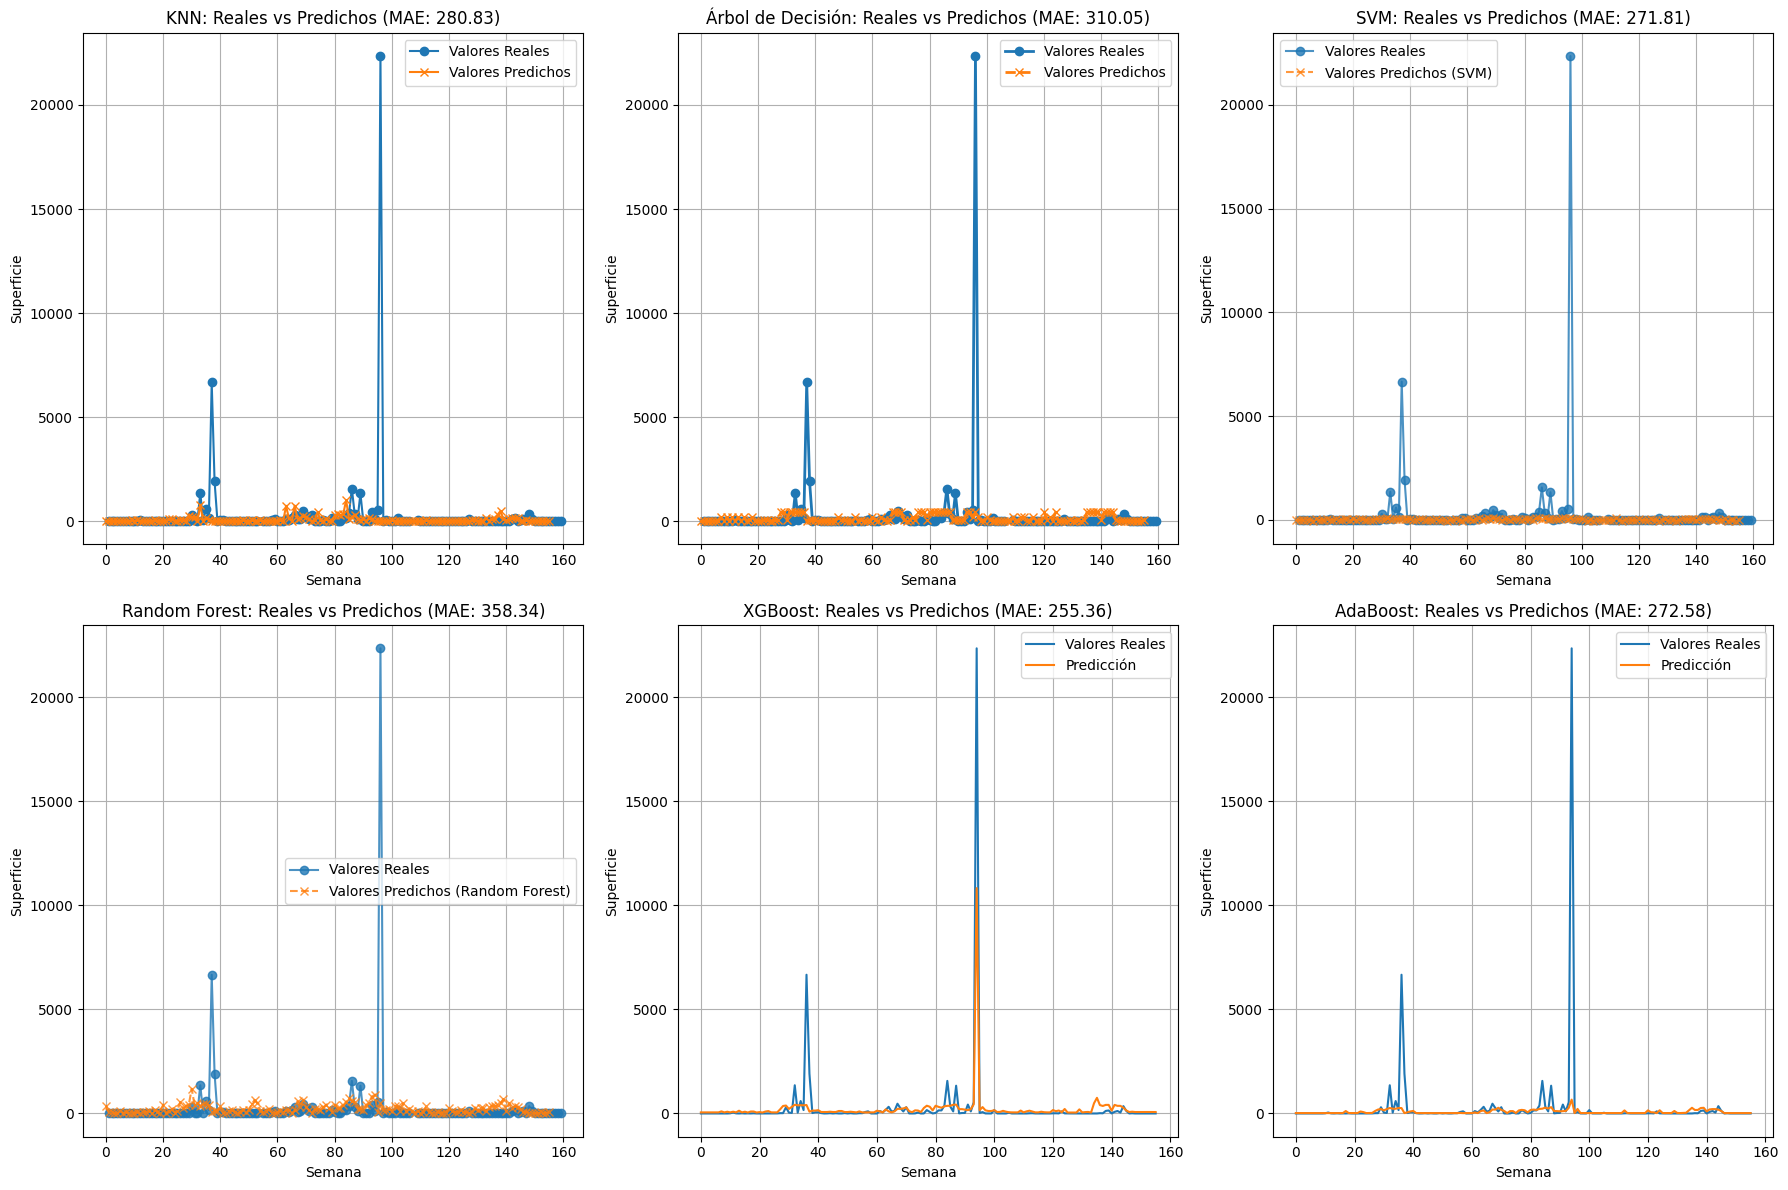

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Crear una tabla de 2 filas y 3 columnas
axes = axes.flatten()  # Aplanar para un acceso sencillo a cada subplot

# Gráfica 1: KNN
y_pred_knn = knn_hpo.best_estimator_.predict(x_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
axes[0].plot(y_test, label='Valores Reales', marker='o')
axes[0].plot(y_pred_knn, label='Valores Predichos', marker='x')
axes[0].set_title(f'KNN: Reales vs Predichos (MAE: {mae_knn:.2f})')
axes[0].set_xlabel('Semana')
axes[0].set_ylabel('Superficie')
axes[0].legend()
axes[0].grid()

# Gráfica 2: Árbol de Decisión
y_pred_dt = tree_hpo.best_estimator_.predict(x_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
axes[1].plot(y_test, label='Valores Reales', marker='o', linestyle='-', linewidth=2)
axes[1].plot(y_pred_dt, label='Valores Predichos', marker='x', linestyle='--', linewidth=2)
axes[1].set_title(f'Árbol de Decisión: Reales vs Predichos (MAE: {mae_dt:.2f})')
axes[1].set_xlabel('Semana')
axes[1].set_ylabel('Superficie')
axes[1].legend()
axes[1].grid()

# Gráfica 3: SVM
y_pred_svm = svm_hpo.best_estimator_.predict(x_test)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
axes[2].plot(y_test, label='Valores Reales', marker='o', linestyle='-', alpha=0.8)
axes[2].plot(y_pred_svm, label='Valores Predichos (SVM)', marker='x', linestyle='--', alpha=0.8)
axes[2].set_title(f'SVM: Reales vs Predichos (MAE: {mae_svm:.2f})')
axes[2].set_xlabel('Semana')
axes[2].set_ylabel('Superficie')
axes[2].legend()
axes[2].grid()

# Gráfica 4: Random Forest
y_pred_rf = rf_hpo.best_estimator_.predict(x_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
axes[3].plot(y_test, label='Valores Reales', marker='o', linestyle='-', alpha=0.8)
axes[3].plot(y_pred_rf, label='Valores Predichos (Random Forest)', marker='x', linestyle='--', alpha=0.8)
axes[3].set_title(f'Random Forest: Reales vs Predichos (MAE: {mae_rf:.2f})')
axes[3].set_xlabel('Semana')
axes[3].set_ylabel('Superficie')
axes[3].legend()
axes[3].grid()

# Gráfica 5: XGBoost
y_pred_xgb = best_model_xgb.predict(x_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
axes[4].plot(y_test.values, label='Valores Reales')
axes[4].plot(y_pred_xgb, label='Predicción')
axes[4].set_title(f'XGBoost: Reales vs Predichos (MAE: {mae_xgb:.2f})')
axes[4].set_xlabel('Semana')
axes[4].set_ylabel('Superficie')
axes[4].legend()
axes[4].grid()

# Gráfica 6: AdaBoost
y_pred_ab = best_model_ab.predict(x_test)
mae_ab = mean_absolute_error(y_test, y_pred_ab)
axes[5].plot(y_test.values, label='Valores Reales')
axes[5].plot(y_pred_ab, label='Predicción')
axes[5].set_title(f'AdaBoost: Reales vs Predichos (MAE: {mae_ab:.2f})')
axes[5].set_xlabel('Semana')
axes[5].set_ylabel('Superficie')
axes[5].legend()
axes[5].grid()

# Ajustar espacio entre subtramas
plt.tight_layout()
plt.show()


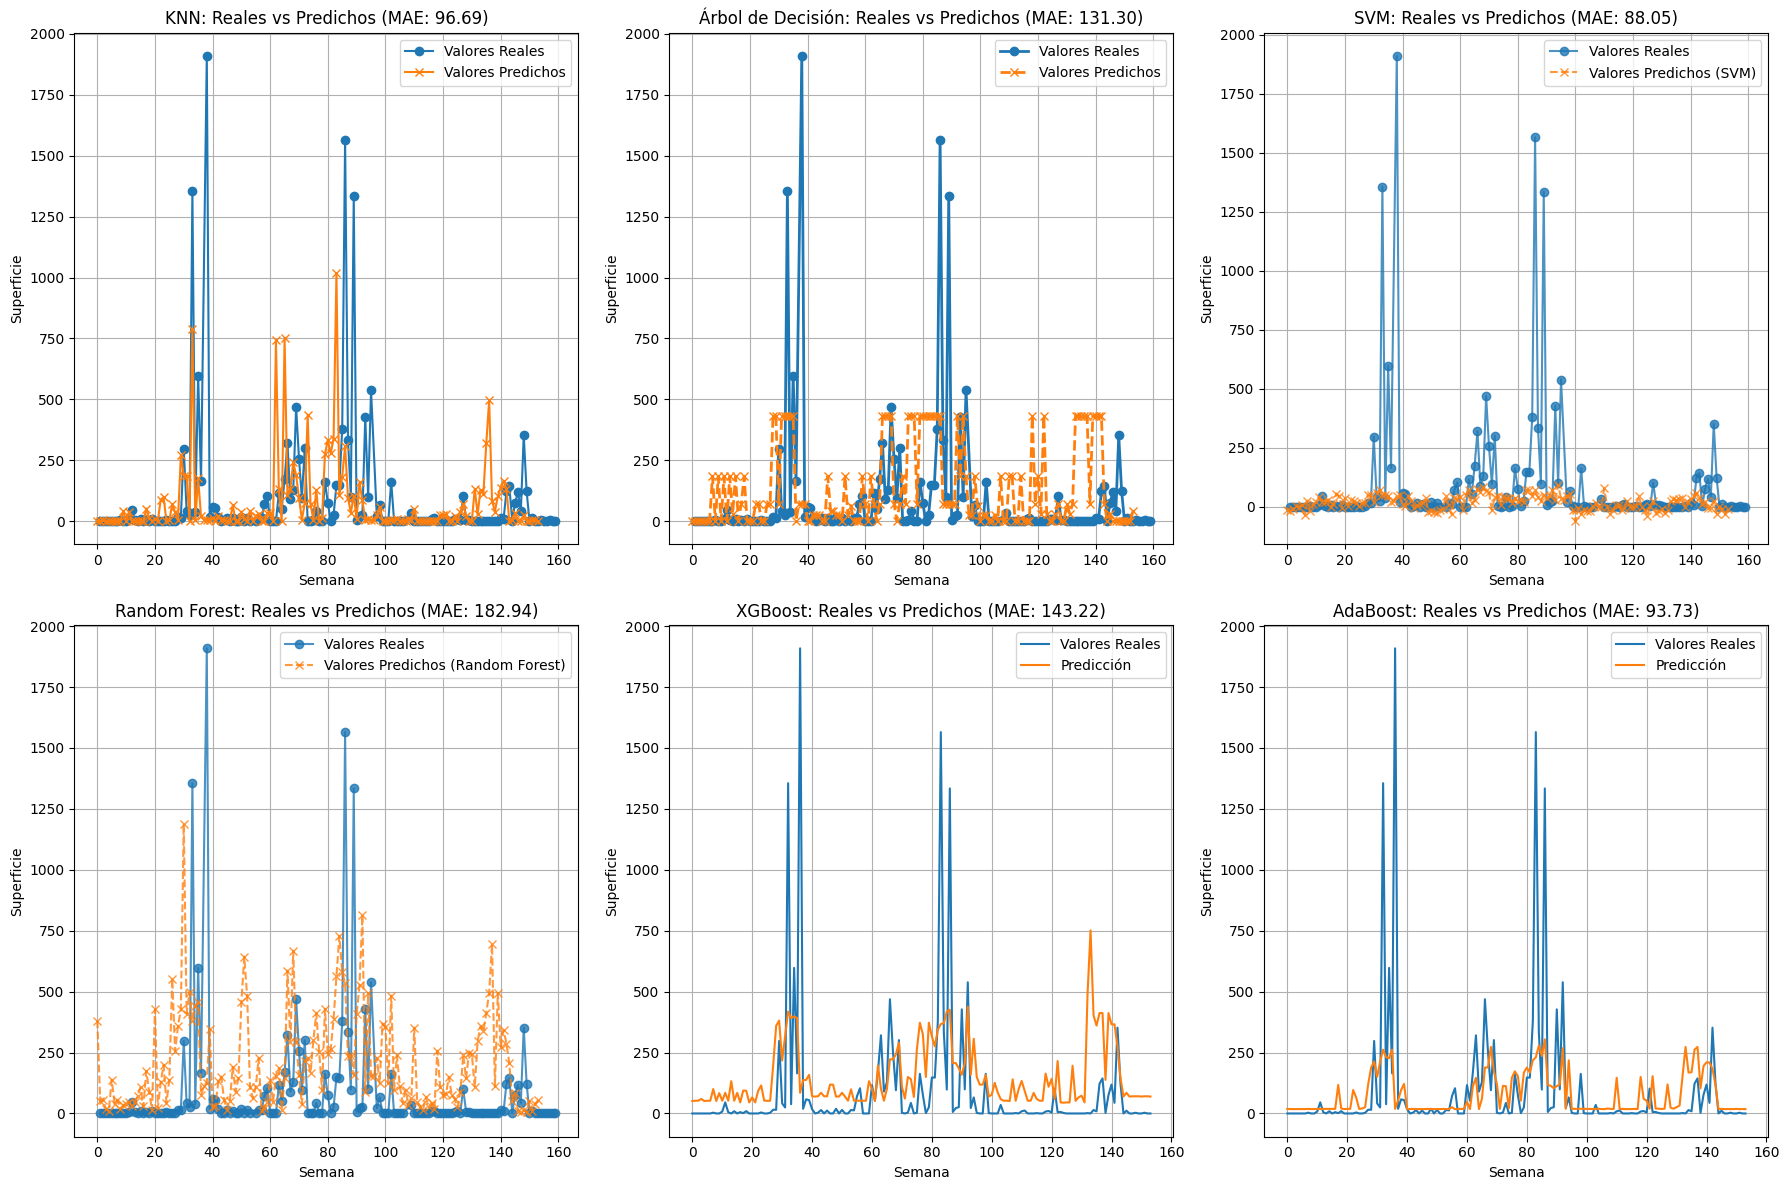

In [42]:
def filter_values(y_true, y_pred):
    mask = y_true <= 4000
    return y_true[mask], y_pred[mask]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Crear una tabla de 2 filas y 3 columnas
axes = axes.flatten()  # Aplanar para un acceso sencillo a cada subplot

# Gráfica 1: KNN
y_pred_knn = knn_hpo.best_estimator_.predict(x_test)
y_test_filtered, y_pred_knn_filtered = filter_values(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test_filtered, y_pred_knn_filtered)
axes[0].plot(y_test_filtered, label='Valores Reales', marker='o')
axes[0].plot(y_pred_knn_filtered, label='Valores Predichos', marker='x')
axes[0].set_title(f'KNN: Reales vs Predichos (MAE: {mae_knn:.2f})')
axes[0].set_xlabel('Semana')
axes[0].set_ylabel('Superficie')
axes[0].legend()
axes[0].grid()

# Gráfica 2: Árbol de Decisión
y_pred_dt = tree_hpo.best_estimator_.predict(x_test)
y_test_filtered, y_pred_dt_filtered = filter_values(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test_filtered, y_pred_dt_filtered)
axes[1].plot(y_test_filtered, label='Valores Reales', marker='o', linestyle='-', linewidth=2)
axes[1].plot(y_pred_dt_filtered, label='Valores Predichos', marker='x', linestyle='--', linewidth=2)
axes[1].set_title(f'Árbol de Decisión: Reales vs Predichos (MAE: {mae_dt:.2f})')
axes[1].set_xlabel('Semana')
axes[1].set_ylabel('Superficie')
axes[1].legend()
axes[1].grid()

# Gráfica 3: SVM
y_pred_svm = svm_hpo.best_estimator_.predict(x_test)
y_test_filtered, y_pred_svm_filtered = filter_values(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test_filtered, y_pred_svm_filtered)
axes[2].plot(y_test_filtered, label='Valores Reales', marker='o', linestyle='-', alpha=0.8)
axes[2].plot(y_pred_svm_filtered, label='Valores Predichos (SVM)', marker='x', linestyle='--', alpha=0.8)
axes[2].set_title(f'SVM: Reales vs Predichos (MAE: {mae_svm:.2f})')
axes[2].set_xlabel('Semana')
axes[2].set_ylabel('Superficie')
axes[2].legend()
axes[2].grid()

# Gráfica 4: Random Forest
y_pred_rf = rf_hpo.best_estimator_.predict(x_test)
y_test_filtered, y_pred_rf_filtered = filter_values(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test_filtered, y_pred_rf_filtered)
axes[3].plot(y_test_filtered, label='Valores Reales', marker='o', linestyle='-', alpha=0.8)
axes[3].plot(y_pred_rf_filtered, label='Valores Predichos (Random Forest)', marker='x', linestyle='--', alpha=0.8)
axes[3].set_title(f'Random Forest: Reales vs Predichos (MAE: {mae_rf:.2f})')
axes[3].set_xlabel('Semana')
axes[3].set_ylabel('Superficie')
axes[3].legend()
axes[3].grid()

# Gráfica 5: XGBoost
y_pred_xgb = best_model_xgb.predict(x_test)
y_test_filtered, y_pred_xgb_filtered = filter_values(y_test.values, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test_filtered, y_pred_xgb_filtered)
axes[4].plot(y_test_filtered, label='Valores Reales')
axes[4].plot(y_pred_xgb_filtered, label='Predicción')
axes[4].set_title(f'XGBoost: Reales vs Predichos (MAE: {mae_xgb:.2f})')
axes[4].set_xlabel('Semana')
axes[4].set_ylabel('Superficie')
axes[4].legend()
axes[4].grid()

# Gráfica 6: AdaBoost
y_pred_ab = best_model_ab.predict(x_test)
y_test_filtered, y_pred_ab_filtered = filter_values(y_test.values, y_pred_ab)
mae_ab = mean_absolute_error(y_test_filtered, y_pred_ab_filtered)
axes[5].plot(y_test_filtered, label='Valores Reales')
axes[5].plot(y_pred_ab_filtered, label='Predicción')
axes[5].set_title(f'AdaBoost: Reales vs Predichos (MAE: {mae_ab:.2f})')
axes[5].set_xlabel('Semana')
axes[5].set_ylabel('Superficie')
axes[5].legend()
axes[5].grid()

# Ajustar espacio entre subtramas
plt.tight_layout()
plt.show()

### Visualizacion de las predicciones de numero de incendios

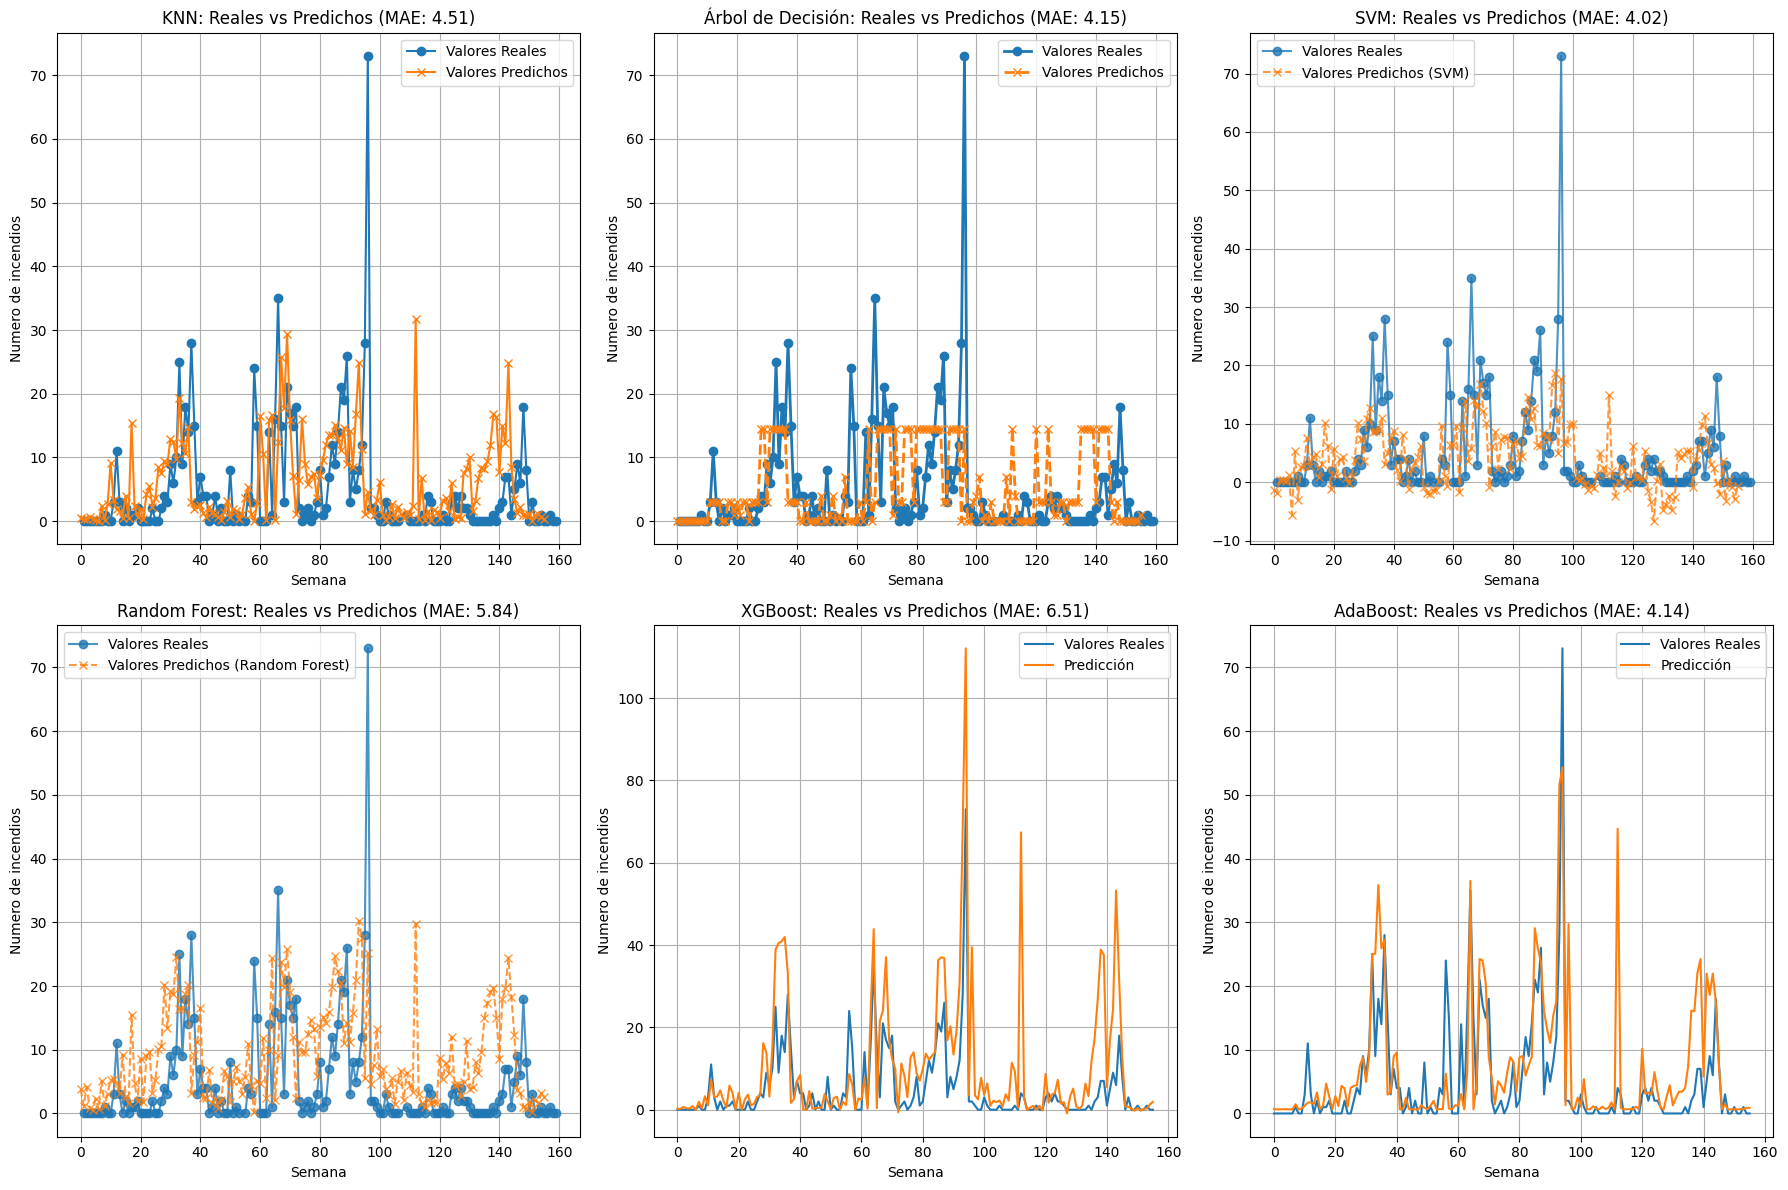

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Crear una tabla de 2 filas y 3 columnas
axes = axes.flatten()  # Aplanar para un acceso sencillo a cada subplot

# Gráfica 1: KNN
y_pred_knn_2 = knn_hpo_2.best_estimator_.predict(x_test)
mae_knn_2 = mean_absolute_error(y_test_2, y_pred_knn_2)
axes[0].plot(y_test_2, label='Valores Reales', marker='o')
axes[0].plot(y_pred_knn_2, label='Valores Predichos', marker='x')
axes[0].set_title(f'KNN: Reales vs Predichos (MAE: {mae_knn_2:.2f})')
axes[0].set_xlabel('Semana')
axes[0].set_ylabel('Numero de incendios')
axes[0].legend()
axes[0].grid()

# Gráfica 2: Árbol de Decisión
y_pred_dt_2 = tree_hpo_2.best_estimator_.predict(x_test)
mae_dt_2 = mean_absolute_error(y_test_2, y_pred_dt_2)
axes[1].plot(y_test_2, label='Valores Reales', marker='o', linestyle='-', linewidth=2)
axes[1].plot(y_pred_dt_2, label='Valores Predichos', marker='x', linestyle='--', linewidth=2)
axes[1].set_title(f'Árbol de Decisión: Reales vs Predichos (MAE: {mae_dt_2:.2f})')
axes[1].set_xlabel('Semana')
axes[1].set_ylabel('Numero de incendios')
axes[1].legend()
axes[1].grid()

# Gráfica 3: SVM
y_pred_svm_2 = svm_hpo_2.best_estimator_.predict(x_test)
mae_svm_2 = mean_absolute_error(y_test_2, y_pred_svm_2)
axes[2].plot(y_test_2, label='Valores Reales', marker='o', linestyle='-', alpha=0.8)
axes[2].plot(y_pred_svm_2, label='Valores Predichos (SVM)', marker='x', linestyle='--', alpha=0.8)
axes[2].set_title(f'SVM: Reales vs Predichos (MAE: {mae_svm_2:.2f})')
axes[2].set_xlabel('Semana')
axes[2].set_ylabel('Numero de incendios')
axes[2].legend()
axes[2].grid()

# Gráfica 4: Random Forest
y_pred_rf_2 = rf_hpo_2.best_estimator_.predict(x_test)
mae_rf_2 = mean_absolute_error(y_test_2, y_pred_rf_2)
axes[3].plot(y_test_2, label='Valores Reales', marker='o', linestyle='-', alpha=0.8)
axes[3].plot(y_pred_rf_2, label='Valores Predichos (Random Forest)', marker='x', linestyle='--', alpha=0.8)
axes[3].set_title(f'Random Forest: Reales vs Predichos (MAE: {mae_rf_2:.2f})')
axes[3].set_xlabel('Semana')
axes[3].set_ylabel('Numero de incendios')
axes[3].legend()
axes[3].grid()

# Gráfica 5: XGBoost
y_pred_xgb_2 = best_model_xgb_2.predict(x_test)
mae_xgb_2 = mean_absolute_error(y_test_2, y_pred_xgb_2)
axes[4].plot(y_test_2.values, label='Valores Reales')
axes[4].plot(y_pred_xgb_2, label='Predicción')
axes[4].set_title(f'XGBoost: Reales vs Predichos (MAE: {mae_xgb_2:.2f})')
axes[4].set_xlabel('Semana')
axes[4].set_ylabel('Numero de incendios')
axes[4].legend()
axes[4].grid()

# Gráfica 6: AdaBoost
y_pred_ab_2 = best_model_ab_2.predict(x_test)
mae_ab_2 = mean_absolute_error(y_test_2, y_pred_ab_2)
axes[5].plot(y_test_2.values, label='Valores Reales')
axes[5].plot(y_pred_ab_2, label='Predicción')
axes[5].set_title(f'AdaBoost: Reales vs Predichos (MAE: {mae_ab_2:.2f})')
axes[5].set_xlabel('Semana')
axes[5].set_ylabel('Numero de incendios')
axes[5].legend()
axes[5].grid()

# Ajustar espacio entre subtramas
plt.tight_layout()
plt.show()
